## 1. Import all of nesscesary library 


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

## 2. Data processing


In [6]:
weather=pd.read_csv('3760009.csv',index_col="DATE")

In [7]:
weather

,STATION,NAME,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV01
DATE,,,,,,,,,,,,,,,,,,,,,
1/30/1972,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",90.0,80.0,NaN,NaN,NaN,0.00,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/31/1972,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.0,0.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/1/1972,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",60.0,60.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/2/1972,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",100.0,100.0,NaN,NaN,NaN,0.03,0.0,0.0,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
2/3/1972,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",100.0,100.0,NaN,NaN,NaN,1.44,0.0,0.0,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7/23/2024,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,5.82,NaN,NaN,0.02,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7/24/2024,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,7.38,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7/25/2024,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,9.84,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
ACMH       0.538100
ACSH       0.538048
AWND       0.228759
FMTM       0.471966
PGTM       0.360090
PRCP       0.000000
SNOW       0.000000
SNWD       0.000104
TAVG       0.644865
TMAX       0.000000
TMIN       0.000000
TSUN       0.998383
WDF1       0.538309
WDF2       0.463569
WDF5       0.467898
WDFG       0.732906
WDFM       0.999948
WESD       0.683409
WSF1       0.538153
WSF2       0.463569
WSF5       0.467950
WSFG       0.610755
WSFM       0.999948
WT01       0.627445
WT02       0.935274
WT03       0.932092
WT04       0.982893
WT05       0.981015
WT06       0.990925
WT07       0.994367
WT08       0.814948
WT09       0.993167
WT11       0.999270
WT13       0.886038
WT14       0.953737
WT15       0.997809
WT16       0.672613
WT17       0.996871
WT18       0.942575
WT19       0.999948
WT21       0.999739
WT22       0.997444
WV01       0.999948
dtype: float64

In [9]:
core_weather=weather[['PRCP','SNOW','SNWD','TMAX','TMIN']].copy()

In [10]:
core_weather.columns=['precip','snow','snow_depth','temp_max','temp_min']

In [11]:
core_weather

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1/30/1972,0.00,0.0,1.0,37,30
1/31/1972,0.00,0.0,0.0,32,23
2/1/1972,0.00,0.0,0.0,38,25
2/2/1972,0.03,0.0,0.0,35,32
2/3/1972,1.44,0.0,0.0,55,32
...,...,...,...,...,...
7/23/2024,0.02,0.0,0.0,85,73
7/24/2024,0.00,0.0,0.0,83,75
7/25/2024,0.00,0.0,0.0,87,75


In [12]:
core_weather.apply(pd.isnull).sum()/weather.shape[0]

precip        0.000000
snow          0.000000
snow_depth    0.000104
temp_max      0.000000
temp_min      0.000000
dtype: float64

In [13]:
core_weather['snow_depth'].value_counts()

snow_depth
0.0     18216
1.0       210
2.0       183
3.0        96
4.0        60
1.2        54
6.0        45
5.0        44
7.0        27
8.0        26
5.1        21
9.0        18
3.1        18
7.1        17
11.0       15
5.9        14
10.0       13
3.9        13
7.9        12
12.0       11
9.1        11
14.0        9
9.8         8
13.0        5
17.0        4
22.0        3
19.0        3
16.0        3
21.0        2
18.0        2
26.0        2
28.0        2
15.0        2
23.0        1
11.8        1
Name: count, dtype: int64

from above result, we still need snow data

In [14]:
core_weather[pd.isnull(core_weather['snow_depth'])]

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
12/29/2023,0.02,0.0,NaN,53,45
12/30/2023,0.00,0.0,NaN,47,38


In [15]:
core_weather['snow_depth']=core_weather['snow_depth'].fillna(0)

In [16]:
core_weather.index

Index(['1/30/1972', '1/31/1972', '2/1/1972', '2/2/1972', '2/3/1972',
       '2/4/1972', '2/5/1972', '2/6/1972', '2/7/1972', '2/8/1972',
       ...
       '7/18/2024', '7/19/2024', '7/20/2024', '7/21/2024', '7/22/2024',
       '7/23/2024', '7/24/2024', '7/25/2024', '7/26/2024', '7/27/2024'],
      dtype='object', name='DATE', length=19173)

In [17]:
core_weather.index=pd.to_datetime(core_weather.index)

In [18]:
core_weather.index

DatetimeIndex(['1972-01-30', '1972-01-31', '1972-02-01', '1972-02-02',
               '1972-02-03', '1972-02-04', '1972-02-05', '1972-02-06',
               '1972-02-07', '1972-02-08',
               ...
               '2024-07-18', '2024-07-19', '2024-07-20', '2024-07-21',
               '2024-07-22', '2024-07-23', '2024-07-24', '2024-07-25',
               '2024-07-26', '2024-07-27'],
              dtype='datetime64[ns]', name='DATE', length=19173, freq=None)

In [19]:
core_weather.index.year

Index([1972, 1972, 1972, 1972, 1972, 1972, 1972, 1972, 1972, 1972,
       ...
       2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024],
      dtype='int32', name='DATE', length=19173)

<Axes: xlabel='DATE'>

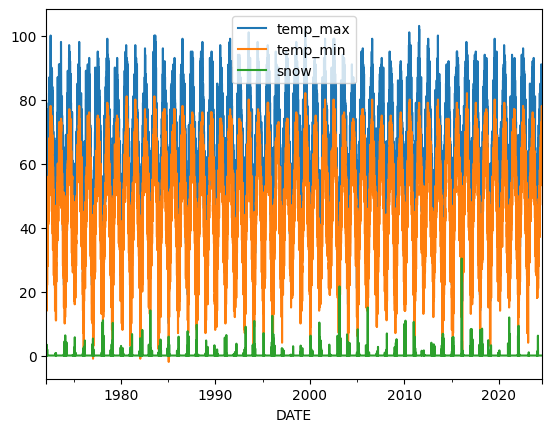

In [20]:
core_weather[['temp_max','temp_min','snow']].plot()

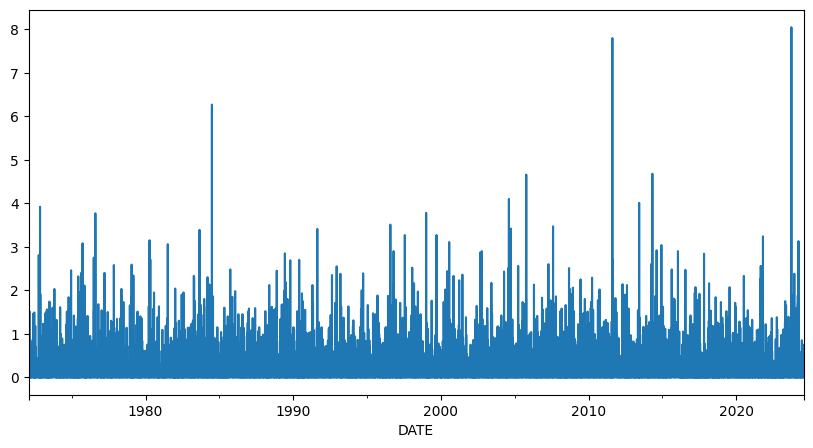

In [21]:
plt.figure(figsize=(10,5))
core_weather['precip'].plot()
plt.show()

In [22]:
core_weather.groupby(core_weather.index.year).sum()['precip']

DATE
1972    47.30
1973    42.04
1974    37.10
1975    57.18
1976    40.24
1977    48.70
1978    40.96
1979    47.21
1980    38.42
1981    34.57
1982    34.06
1983    59.12
1984    53.22
1985    33.01
1986    40.46
1987    39.07
1988    40.66
1989    55.73
1990    45.24
1991    38.73
1992    38.38
1993    35.61
1994    43.33
1995    34.42
1996    51.45
1997    39.87
1998    37.55
1999    40.10
2000    41.02
2001    32.72
2002    43.13
2003    44.77
2004    50.95
2005    49.55
2006    44.80
2007    46.91
2008    46.26
2009    45.88
2010    42.47
2011    55.78
2012    39.85
2013    35.48
2014    50.75
2015    38.31
2016    36.01
2017    43.11
2018    57.40
2019    51.99
2020    40.89
2021    43.46
2022    35.77
2023    52.58
2024    27.46
Name: precip, dtype: float64

In [23]:
core_weather["target"]= core_weather.shift(-1)['temp_max']

In [24]:
core_weather

,precip,snow,snow_depth,temp_max,temp_min,target
DATE,,,,,,
1972-01-30,0.00,0.0,1.0,37,30,32.0
1972-01-31,0.00,0.0,0.0,32,23,38.0
1972-02-01,0.00,0.0,0.0,38,25,35.0
1972-02-02,0.03,0.0,0.0,35,32,55.0
1972-02-03,1.44,0.0,0.0,55,32,52.0
...,...,...,...,...,...,...
2024-07-23,0.02,0.0,0.0,85,73,83.0
2024-07-24,0.00,0.0,0.0,83,75,87.0
2024-07-25,0.00,0.0,0.0,87,75,86.0


In [25]:
core_weather= core_weather.iloc[:-1,:].copy()

In [26]:
core_weather

,precip,snow,snow_depth,temp_max,temp_min,target
DATE,,,,,,
1972-01-30,0.00,0.0,1.0,37,30,32.0
1972-01-31,0.00,0.0,0.0,32,23,38.0
1972-02-01,0.00,0.0,0.0,38,25,35.0
1972-02-02,0.03,0.0,0.0,35,32,55.0
1972-02-03,1.44,0.0,0.0,55,32,52.0
...,...,...,...,...,...,...
2024-07-22,0.05,0.0,0.0,82,72,85.0
2024-07-23,0.02,0.0,0.0,85,73,83.0
2024-07-24,0.00,0.0,0.0,83,75,87.0


In [27]:
# %pip install Ridge


reg=Ridge(alpha=.1)

In [47]:
predictors=["precip","temp_max","temp_min"]
train= core_weather.loc[:"2020-12-31"]
test=core_weather.loc["2021-01-01":]

In [48]:
reg.fit(train[predictors],train["target"])

Ridge(alpha=0.1)

In [30]:
predictions=reg.predict(test[predictors])

In [31]:
mean_absolute_error(test['target'],predictions)

np.float64(5.092726478289776)

In [32]:
combined=pd.concat ([test['target'],pd.Series(predictions,index=test.index)],axis=1)

In [33]:
combined

,target,0
DATE,,
2021-01-01,53.0,42.286768
2021-01-02,39.0,51.962008
2021-01-03,45.0,44.053199
2021-01-04,43.0,47.927204
2021-01-05,43.0,47.556274
...,...,...
2024-07-22,85.0,83.588447
2024-07-23,83.0,85.492616
2024-07-24,87.0,85.650290


<Axes: xlabel='DATE'>

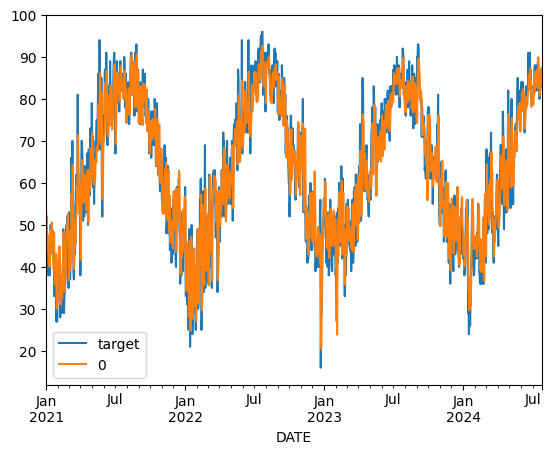

In [34]:
combined.plot()

In [35]:
reg.coef_

array([-1.31330648,  0.44976654,  0.51547063])

In [36]:
# def create_predictions(predictors,core_weather,reg):
    

    

In [37]:
core_weather['month_max']= core_weather['temp_max'].rolling(30).mean()
core_weather

,precip,snow,snow_depth,temp_max,temp_min,target,month_max
DATE,,,,,,,
1972-01-30,0.00,0.0,1.0,37,30,32.0,NaN
1972-01-31,0.00,0.0,0.0,32,23,38.0,NaN
1972-02-01,0.00,0.0,0.0,38,25,35.0,NaN
1972-02-02,0.03,0.0,0.0,35,32,55.0,NaN
1972-02-03,1.44,0.0,0.0,55,32,52.0,NaN
...,...,...,...,...,...,...,...
2024-07-22,0.05,0.0,0.0,82,72,85.0,84.000000
2024-07-23,0.02,0.0,0.0,85,73,83.0,84.000000
2024-07-24,0.00,0.0,0.0,83,75,87.0,83.933333


In [38]:
# core_weather['month_day_max']=core_weather['month_max']/ core_weather['temp_max']
core_weather[pd.isnull(core_weather['month_max'])]

,precip,snow,snow_depth,temp_max,temp_min,target,month_max
DATE,,,,,,,
1972-01-30,0.00,0.0,1.0,37,30,32.0,NaN
1972-01-31,0.00,0.0,0.0,32,23,38.0,NaN
1972-02-01,0.00,0.0,0.0,38,25,35.0,NaN
1972-02-02,0.03,0.0,0.0,35,32,55.0,NaN
1972-02-03,1.44,0.0,0.0,55,32,52.0,NaN
1972-02-04,0.00,0.0,0.0,52,23,26.0,NaN
1972-02-05,0.00,0.0,0.0,26,17,35.0,NaN
1972-02-06,0.31,2.8,0.0,35,22,32.0,NaN
1972-02-07,0.02,0.2,3.0,32,18,25.0,NaN


In [39]:
core_weather=core_weather.iloc[30:,:].copy()
core_weather['month_day_max']=core_weather['month_max']/ core_weather['temp_max']
core_weather['max_min']=core_weather['temp_max']/core_weather['temp_min']

In [40]:
core_weather

,precip,snow,snow_depth,temp_max,temp_min,target,month_max,month_day_max,max_min
DATE,,,,,,,,,
1972-02-29,0.00,0.0,0.0,65,39,58.0,40.533333,0.623590,1.666667
1972-03-01,0.00,0.0,0.0,58,42,55.0,41.400000,0.713793,1.380952
1972-03-02,0.00,0.0,0.0,55,46,53.0,41.966667,0.763030,1.195652
1972-03-03,0.86,0.0,0.0,53,28,41.0,42.566667,0.803145,1.892857
1972-03-04,0.00,0.0,0.0,41,21,44.0,42.100000,1.026829,1.952381
...,...,...,...,...,...,...,...,...,...
2024-07-22,0.05,0.0,0.0,82,72,85.0,84.000000,1.024390,1.138889
2024-07-23,0.02,0.0,0.0,85,73,83.0,84.000000,0.988235,1.164384
2024-07-24,0.00,0.0,0.0,83,75,87.0,83.933333,1.011245,1.106667


In [41]:
core_weather[pd.isnull(core_weather['max_min'])]

,precip,snow,snow_depth,temp_max,temp_min,target,month_max,month_day_max,max_min
DATE,,,,,,,,,


In [75]:
predictors=["precip","temp_max","temp_min","month_max","month_day_max"]


In [43]:
# core_weather=core_weather.iloc[30:,:].copy()

In [50]:
train= core_weather.loc[:"2020-12-31",:]
test=core_weather.loc["2021-01-01":,:]
# reg.fit(train[predictors],train['target'])
# predictions=reg.predict(test[predictors])
# error=mean_absolute_error(test['target'],predictions)
# combined=pd.concat ([test['target'],pd.Series(predictions,index=test.index)],axis=1)
# combined.columns=['actual','predict']


In [51]:
train

,precip,snow,snow_depth,temp_max,temp_min,target,month_max,month_day_max,max_min
DATE,,,,,,,,,
1972-02-29,0.00,0.0,0.0,65,39,58.0,40.533333,0.623590,1.666667
1972-03-01,0.00,0.0,0.0,58,42,55.0,41.400000,0.713793,1.380952
1972-03-02,0.00,0.0,0.0,55,46,53.0,41.966667,0.763030,1.195652
1972-03-03,0.86,0.0,0.0,53,28,41.0,42.566667,0.803145,1.892857
1972-03-04,0.00,0.0,0.0,41,21,44.0,42.100000,1.026829,1.952381
...,...,...,...,...,...,...,...,...,...
2020-12-27,0.00,0.0,0.0,38,24,51.0,45.733333,1.203509,1.583333
2020-12-28,0.00,0.0,0.0,51,33,43.0,45.533333,0.892810,1.545455
2020-12-29,0.00,0.0,0.0,43,28,43.0,45.233333,1.051938,1.535714


In [76]:

reg.fit(train[predictors],train["target"])

Ridge(alpha=0.1)

In [77]:
predictions=reg.predict(test[predictors])

In [78]:
error= mean_absolute_error(predictions,test['target'])
combined=pd.concat([test['target'], pd.Series(predictions,index=test.index)],axis=1)
combined.columns=['actual','combined']

In [79]:
error

np.float64(4.9369033991479885)

<Axes: xlabel='DATE'>

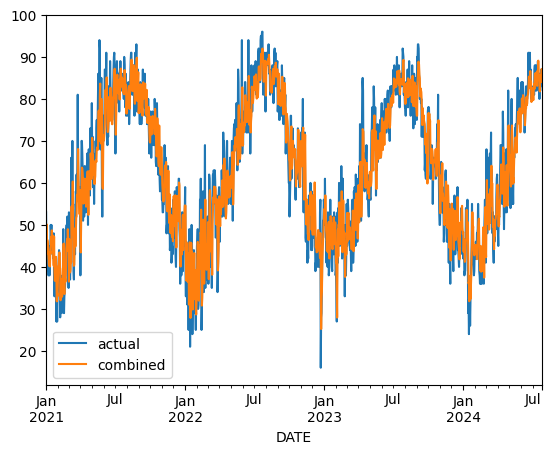

In [80]:
combined.plot()